In [ ]:
#from google.colab import drive
#drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from pathlib import Path
from glob import glob
from sklearn.metrics import confusion_matrix
import random
import pandas as pd
import numpy as np
import os
import shutil
import re
import seaborn as sns

In [ ]:
path = Path(os.getcwd())/'/data/'
path

PosixPath('/content/drive/My Drive/datas')

In [ ]:
from fastai.vision import *
tfms = get_transforms(do_flip=True,flip_vert=True, max_rotate = 25) # FOR RESNET34 AND DENSENET121 MODELS.
#tfms = get_transforms(do_flip=True,flip_vert=True, max_rotate = 50) #FOR MOBILENET V2 MODEL.

In [ ]:
data = ImageDataBunch.from_folder('/data/', train = 'train', test='test', ds_tfms = tfms, bs=16, size = (384, 512))

In [ ]:
data

ImageDataBunch;

Train: LabelList (2058 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/drive/My Drive/datas;

Valid: LabelList (648 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
compost,compost,compost,compost,compost
Path: /content/drive/My Drive/datas;

Test: LabelList (644 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/datas

In [ ]:
print(data.classes)

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


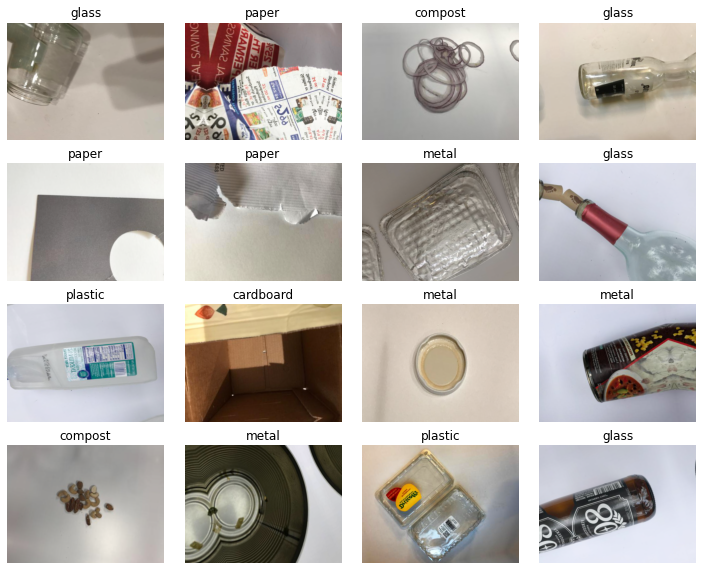

In [ ]:
data.show_batch(rows=4,figsize=(10,8))

#LOAD EITHER OF THE MODELS MENTIONED BELOW PRETRAINED ON THE IMAGENET DATASET

In [ ]:
learn = create_cnn(data,models.resnet34,metrics=accuracy)
#learn = create_cnn(data, models.densenet121, metrics = accuracy)
#learn = create_cnn(data, models.mobilenetv2, metrics = accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

###Finding most appropriate learning rate for optimum training by plotting lograithmic learning rate and plotting it against loss for one epoch over severak iterations.
###Best LR = One before exploding or converging.

In [ ]:
# learn.lr_find(start_lr=1e-6,end_lr=1e1)
# learn.recorder.plot()

In [ ]:
learn.load("/data/models/resnet34_96_point_27_rotation_25")

Learner(data=ImageDataBunch;

Train: LabelList (2058 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/drive/My Drive/datas;

Valid: LabelList (648 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
compost,compost,compost,compost,compost
Path: /content/drive/My Drive/datas;

Test: LabelList (644 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/datas, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, pa

In [ ]:
learn.recorder.plot(suggestion = True)

#TRAINING THE MODEL =>


In [ ]:
learn.fit_one_cycle(60,max_lr=5.13E-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.166714,0.544055,0.820988,11:50
1,0.941056,0.336614,0.890432,01:20
2,0.686975,0.232178,0.927469,01:19
3,0.646095,0.221513,0.927469,01:18
4,0.551122,0.218372,0.927469,01:18
5,0.540796,0.298283,0.899691,01:19
6,0.488503,0.246464,0.912037,01:19
7,0.556628,0.232780,0.915123,01:19
8,0.528309,0.224193,0.927469,01:20
9,0.609820,0.301440,0.887346,01:19


#LOAD MODEL =>

In [ ]:
learn.load("/data/models/mobilenet_v2_trash_96_point_27_max_rotate_50_60_epochs_max_lr_5_13E_03")

Learner(data=ImageDataBunch;

Train: LabelList (2058 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/drive/My Drive/datas;

Valid: LabelList (648 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
compost,compost,compost,compost,compost
Path: /content/drive/My Drive/datas;

Test: LabelList (644 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/datas, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inp

In [ ]:
import torch.quantization

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
gradcam_image = interp.GradCAM(0, ds_type=DatasetType.Test)

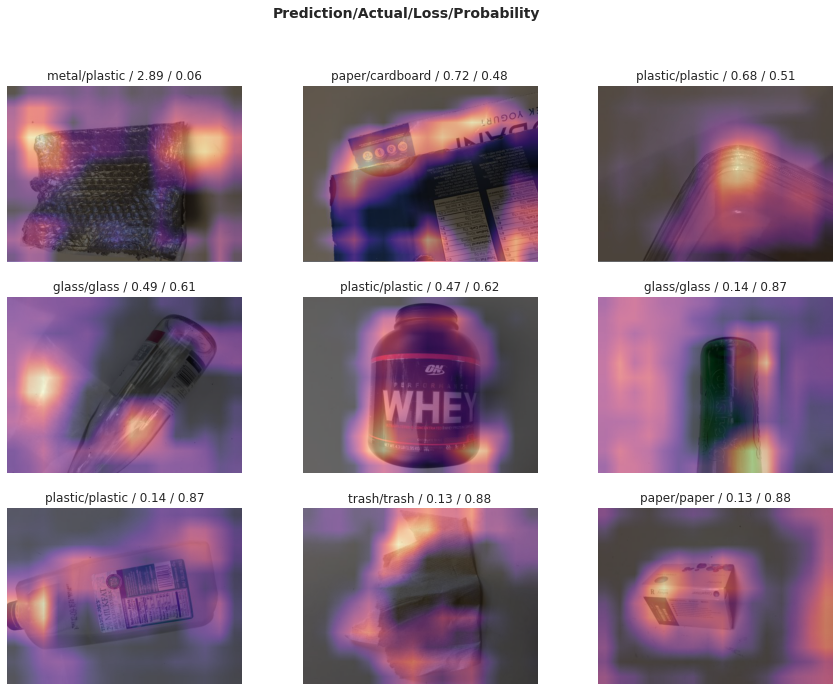

In [ ]:
sns.set(font_scale = 1.0)
interp.plot_top_losses(9, figsize=(15,11), heatmap = True)

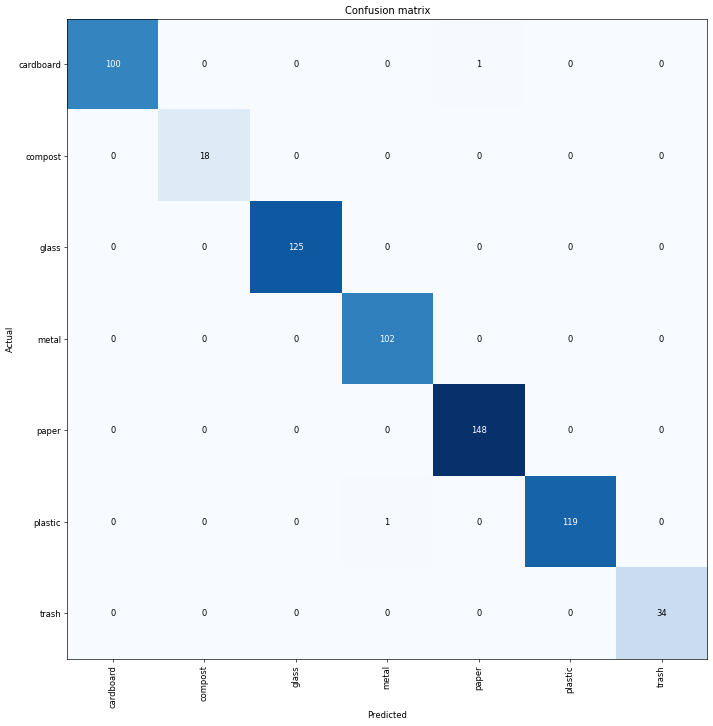

In [ ]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[]

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
print(preds[0].shape)
preds[0]

torch.Size([644, 7])


tensor([[3.2763e-08, 9.9767e-01, 1.2026e-03,  ..., 6.2280e-06, 9.4833e-04,
         7.4177e-06],
        [8.8933e-12, 9.9999e-01, 6.7651e-06,  ..., 1.0957e-09, 2.7807e-08,
         2.2031e-11],
        [5.2019e-05, 2.2814e-01, 5.1904e-07,  ..., 2.6671e-02, 2.7306e-03,
         7.4241e-01],
        ...,
        [2.8601e-07, 6.8626e-09, 9.2811e-07,  ..., 7.1399e-06, 1.3376e-06,
         9.9999e-01],
        [8.1710e-03, 3.0932e-03, 6.1802e-01,  ..., 2.4600e-01, 9.2521e-02,
         2.3462e-02],
        [2.6094e-04, 3.8874e-06, 6.1824e-07,  ..., 3.1059e-03, 2.5037e-05,
         9.9656e-01]])

In [ ]:
data.classes

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

learn.data.test_ds[0][0]

In [ ]:
y = []

# Convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
# Extracting waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [ ]:
# Predicted values
print(yhat[0:5])
# Actual values
print(y[0:5])

['compost', 'compost', 'trash', 'compost', 'compost']
['compost', 'compost', 'compost', 'compost', 'compost']


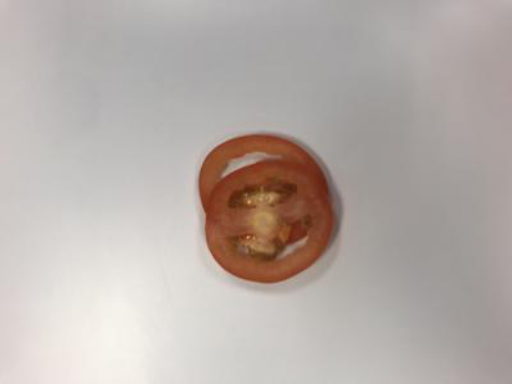

In [ ]:
learn.data.test_ds[0][0]

In [ ]:
cm = confusion_matrix(y,yhat)
print(cm)

[[ 97   0   0   1   1   0   0]
 [  0  10   0   0   0   0   1]
 [  0   0 119   6   0   1   0]
 [  0   0   0 101   0   0   2]
 [  1   0   0   0 146   0   2]
 [  0   0   2   0   2 117   0]
 [  0   0   1   2   1   1  30]]


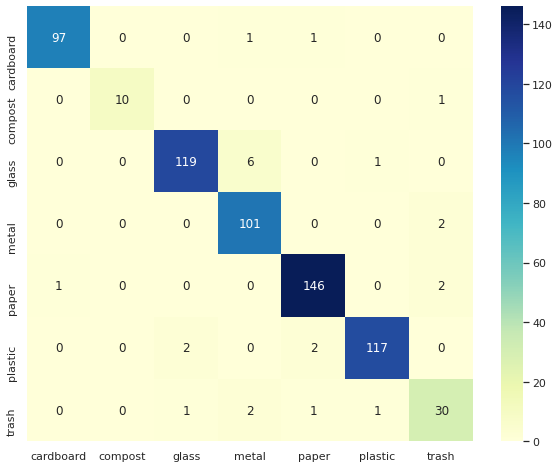

In [ ]:
waste_types = ['cardboard', 'compost', 'glass','metal','paper','plastic','trash']
sns.set(font_scale = 1.0)
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [ ]:
accuracy = correct/sum(sum(cm))
accuracy * 100

0.9627329192546584

#EXPORT TRAINED MODEL

In [ ]:
#learn.export("/mobilenet_v2_data_aug_rotation_50_trash_95_point_65217_acc_60max_lr_5_13E_03")

In [ ]:
#learn.save("/resnet_trash_96_point_27_max_rotate_50_60_epochs_max_lr_5_13E_03")

#LOADING TRAINED MODEL

In [ ]:
#learn.load("/resnet_trash_94_point_3_acc_60max_lr_5_13E_03")

Learner(data=ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/dat;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/dat;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/dat, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   